# Marble Interaction in Autism-Related Rat Models: Behavioral Phenotyping of Arid1b, Grin2b, and Scn2a Strains

This tutorial shows how to access the data related to [EMBER:000200](https://dandi.emberarchive.org/dandiset/000200) using pynwb.

This dataset contains behavioral data from the marble interaction experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

## Contents

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Access Devices Metadata](#devices)
4. [Access Behavioral Videos](#behavior)
5. [Access Annotated Behavioral Events](#events)

---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [1]:
# Core data manipulation and analysis
from pathlib import Path

import h5py

# Visualization
import matplotlib.pyplot as plt
import remfile
from dandi.dandiapi import DandiAPIClient, DandiInstance

# NWB and DANDI access
from pynwb import NWBHDF5IO

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Data Access Functions

In [2]:
def load_nwb_from_dandi(dandiset_id, subject_id, session_id):
    """
    Load NWB file from DANDI Archive via streaming.
    """
    pattern = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}*.nwb"
    dandi_instance = DandiInstance(
        "ember",
        "https://dandi.emberarchive.org",
        "https://api-dandi.emberarchive.org/api",
    )
    with DandiAPIClient(dandi_instance=dandi_instance) as client:
        client.dandi_authenticate()
        assets = client.get_dandiset(dandiset_id, "draft").get_assets_by_glob(
            pattern=pattern, order="path"
        )

        s3_urls = []
        for asset in assets:
            s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)
            s3_urls.append(s3_url)

        if len(s3_urls) != 1:
            raise ValueError(f"Expected 1 file, found {len(s3_urls)} for pattern {pattern}")

        s3_url = s3_urls[0]

    file = remfile.File(s3_url)
    h5_file = h5py.File(file, "r")
    io = NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwbfile = io.read()

    return nwbfile, io


def load_nwb_local(directory_path, subject_id, session_id):
    """
    Load NWB file from local directory.
    """
    directory_path = Path(directory_path)
    nwbfile_path = directory_path / f"sub-{subject_id}_ses-{session_id}.nwb"
    
    if not nwbfile_path.exists():
        raise FileNotFoundError(f"NWB file not found: {nwbfile_path}")
    
    io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
    nwbfile = io.read()
    
    return nwbfile, io

In [3]:
# Load session data
dandiset_id = "000200"
session_id = "MI-Test"
subject_id = "408-Arid1b(3)"

# Choose data source (DANDI streaming or local)
USE_DANDI = True  # Set to False to use local files

if USE_DANDI:
    nwbfile, io = load_nwb_from_dandi(dandiset_id, subject_id, session_id)
else:
    # Specify your local directory path
    local_directory = "YOUR_DIRECTORY_PATH"  # Replace with actual path
    nwbfile, io = load_nwb_local(local_directory, subject_id, session_id)

c:\Users\amtra\anaconda3\envs\kind-lab-to-nwb-env\Lib\site-packages\hdmf\spec\namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


---

# 2. Session and Subject Metadata <a id="metadata"></a>

In [4]:
print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

=== SESSION INFORMATION ===
Experiment description:
 This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB. 
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing. 
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated marble interaction behavior in different rat models 
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518, 
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515, 
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530)
us

In [5]:
print("=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Species: {nwbfile.subject.species}")
print(f"Strain: {nwbfile.subject.strain}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SUBJECT INFORMATION ===
ID: 408-Arid1b(3)
Age: None
Species: Rattus norvegicus
Strain: Arid1b
Genotype: WT
Sex: M


---

# 3. Access Devices Metadata <a id="devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["camera_device 0"]

camera_device 0 abc.CameraDevice at 0x2161707518160
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

In [7]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x2161707916944
Fields:
  description: Plastic box identical to home cage base (63x50x30 cm) with white plastic panels
in frame around sides to total height of 90 cm

In [8]:
nwbfile.devices["Marbles"]

Marbles pynwb.device.Device at 0x2161707918992
Fields:
  description: 20 black shiny glass marbles (25mm diameter, Opal marble)
  manufacturer: House of Marbles UK

---

# 4. Access Behavioral Video <a id="behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [9]:
video = nwbfile.acquisition["BehavioralVideo"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(76859,)"


The video filepath:

In [10]:
video.external_file[0]

'sub-408-Arid1b(3)_ses-MI-Test_image\\b796ce62-77cd-4588-a290-17d41149cc18_external_file_0.mp4'

The metadata of the device used to record the behavioral video:


In [11]:
video.device

camera_device 0 abc.CameraDevice at 0x2161707518160
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

---

# 5. Access Annotated Behavioral Events <a id="events"></a>

The `nwbfile.processing["events]` contains annotated events. These are stored in the `AnnotatedEventsTable` type. The `AnnotatedEventsTable` type is a subtype of `DynamicTable`, where each row corresponds to a different event type. The table has a ragged (variable-length) 1D column of event times, such that each event type (row) is associated with an array of event times

You can convert the table to a `pandas.DataFrame` for easier exploration:


In [14]:
behavioral_events = nwbfile.processing["behavior"]["AnnotatedBehavioralEvents"].to_dataframe()
behavioral_events

,duration,event_times,label,event_description
id,,,,
0,"[3.0, 0.9009999999999962, 12.600999999999999, ...","[70.901, 88.001, 96.101, 110.701, 129.503, 142...",paw on marble,"paw touching / gripping marble, not just walki..."
1,"[nan, nan]","[61.702, 1261.702]",start/stop,start and end of exp (20 min)


C:\Users\amtra\AppData\Local\Temp\ipykernel_14888\853228197.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((time, idx-0.4), duration, 0.8,


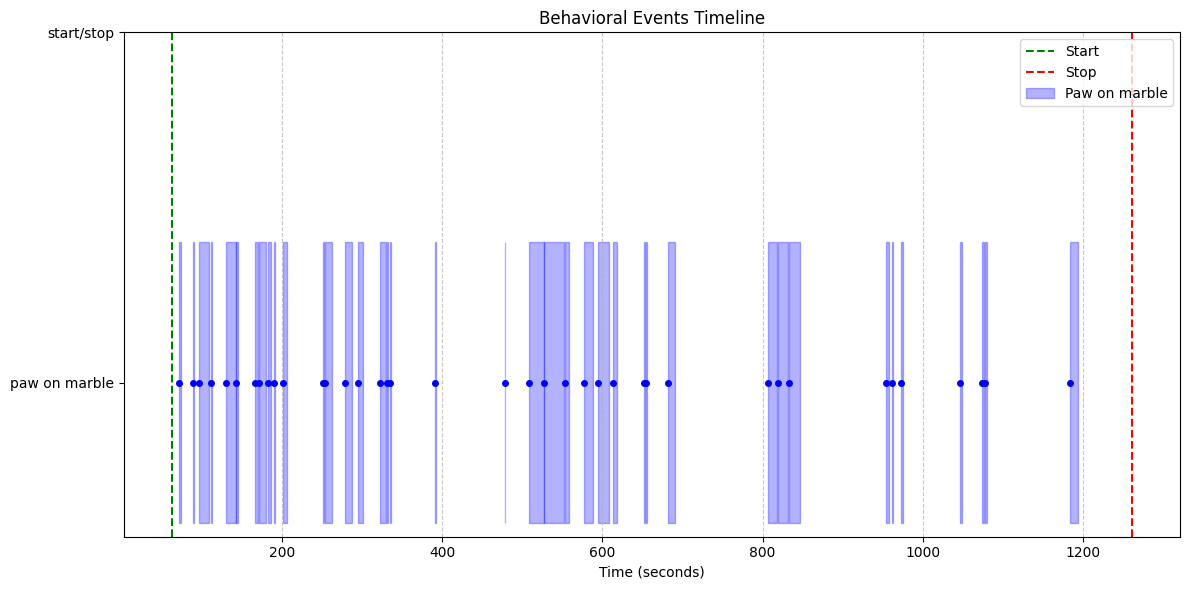

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Extract event types and their times
for idx, row in behavioral_events.iterrows():
    label = row['label']
    times = np.array(row['event_times'])
    durations = np.array(row['duration'])
    
    # For start/stop events, plot vertical lines as before
    if label == 'start/stop':
        ax.axvline(x=times[0], color='green', linestyle='--', label='Start')
        ax.axvline(x=times[1], color='red', linestyle='--', label='Stop')
    else:
        # For paw on marble events, plot faded rectangles
        for i, (time, duration) in enumerate(zip(times, durations)):
            if not np.isnan(duration):
                # Add a faded rectangle for the duration of the event
                rect = plt.Rectangle((time, idx-0.4), duration, 0.8, 
                                    alpha=0.3, color='blue', 
                                    edgecolor='blue', linewidth=1)
                ax.add_patch(rect)
                
                # Add a dot at the start of each event
                ax.plot(time, idx, 'bo', markersize=4)

# Add labels and title
ax.set_xlabel('Time (seconds)')
ax.set_yticks(range(len(behavioral_events)))
ax.set_yticklabels(behavioral_events['label'])
ax.set_title('Behavioral Events Timeline')
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Add a blue patch to the legend for the paw on marble events
from matplotlib.patches import Patch
blue_patch = Patch(color='blue', alpha=0.3, label='Paw on marble')
ax.legend(handles=[*by_label.values(), blue_patch], labels=[*by_label.keys(), 'Paw on marble'], loc='upper right')

plt.tight_layout()
plt.show()